In [1]:
from datetime import datetime
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data = pd.read_csv(r'heart.csv')

### Basic Exploratory Data Analysis

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [5]:
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
73,51,1,0,140,261,0,0,186,1,0.0,2,0,2,1
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0
127,67,0,2,152,277,0,1,172,0,0.0,2,1,2,1
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3,0
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1


In [8]:
data.shape

(303, 14)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
data.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
data.cp.value_counts() #Chest Pain type

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

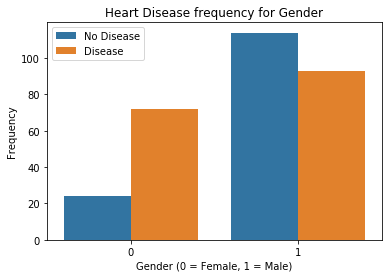

In [14]:
sns.countplot('sex', hue = 'target', data = data)

plt.title('Heart Disease frequency for Gender')
plt.legend(['No Disease', 'Disease'])

plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Frequency')
plt.show()

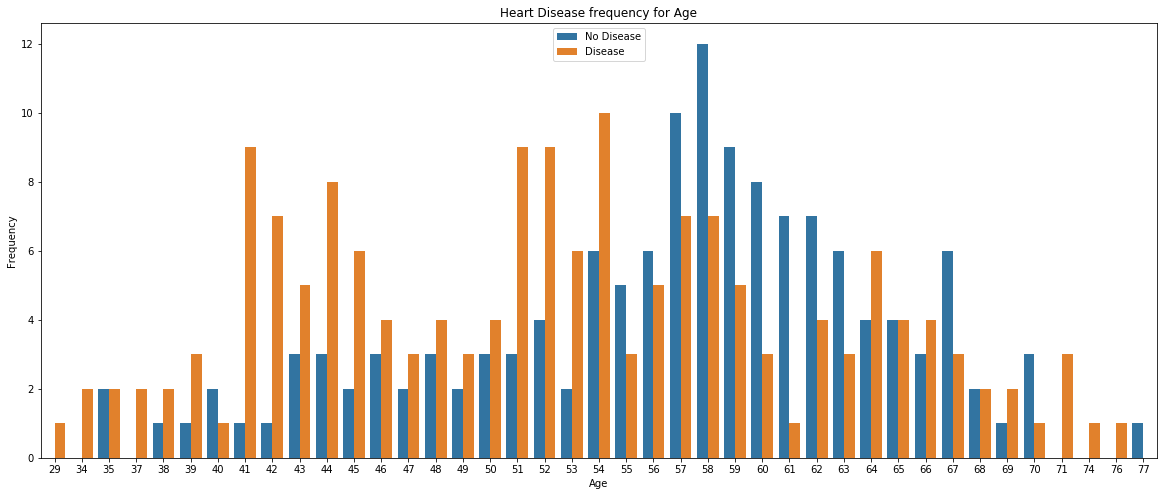

In [15]:
plt.figure(figsize= (20,8))
sns.countplot('age', hue = 'target', data = data)

plt.title('Heart Disease frequency for Age')
plt.legend(['No Disease', 'Disease'])

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

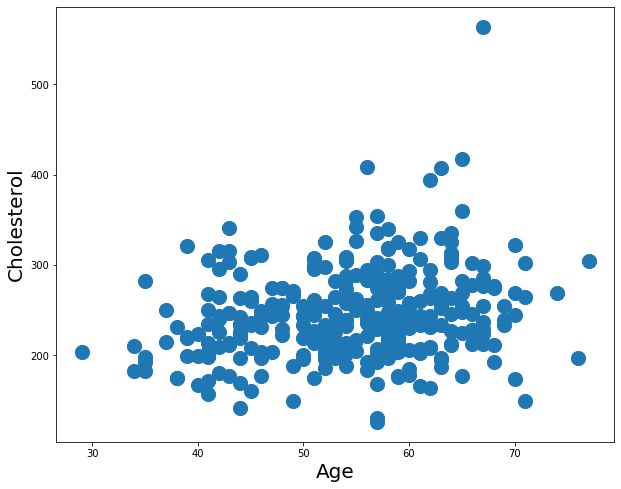

In [17]:
plt.figure(figsize= (10,8))
plt.scatter(data['age'], data['chol'], s=200)

plt.xlabel('Age', fontsize = 20)
plt.ylabel('Cholesterol', fontsize = 20)
plt.show()

##### Data Preprocessing

In [18]:
features = data.drop('target', axis = 1)

target = data[['target']]

In [19]:
features.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2
257,50,1,0,144,200,0,0,126,1,0.9,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
66,51,1,2,100,222,0,1,143,1,1.2,1,0,2
215,43,0,0,132,341,1,0,136,1,3.0,1,0,3


In [20]:
target.sample(5)

,target
266,0
128,1
178,0
147,1
82,1


In [39]:
categorical_features = features[['sex', 'fbs', 'exang', 'cp', 'ca',
                                 'slope', 'thal', 'restecg']].copy()

categorical_features.head()

,sex,fbs,exang,cp,ca,slope,thal,restecg
0,1,1,0,3,0,0,1,0
1,1,0,0,2,0,0,2,1
2,0,0,0,1,0,2,2,0
3,1,0,0,1,0,2,2,1
4,0,0,1,0,0,2,2,1


In [40]:
numeric_features = features[['age', 'trestbps', 'chol',
                               'thalach', 'oldpeak']].copy()
numeric_features.head()

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [41]:
scaler = StandardScaler()

numeric_features = pd.DataFrame(scaler.fit_transform(numeric_features),
                                columns = numeric_features.columns,
                                index = numeric_features.index)
numeric_features.describe()

,age,trestbps,chol,thalach,oldpeak
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,5.825923e-17,-7.146832e-16,-9.828955e-17,-5.203025e-16,-3.140136e-16
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.797624e+00,-2.148802e+00,-2.324160e+00,-3.439267e+00,-8.968617e-01
25%,-7.572802e-01,-6.638668e-01,-6.814943e-01,-7.061105e-01,-8.968617e-01
50%,6.988599e-02,-9.273778e-02,-1.210553e-01,1.466343e-01,-2.067053e-01
75%,7.316189e-01,4.783913e-01,5.456738e-01,7.151309e-01,4.834512e-01
max,2.496240e+00,3.905165e+00,6.140401e+00,2.289429e+00,4.451851e+00


In [42]:
processed_features = pd.concat([numeric_features, categorical_features], axis=1,
                               sort = False)
processed_features.head()

,age,trestbps,chol,thalach,oldpeak,sex,fbs,exang,cp,ca,slope,thal,restecg
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,1,0,3,0,0,1,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,0,2,0,0,2,1
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,0,0,0,1,0,2,2,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,0,1,0,2,2,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,0,0,1,0,0,2,2,1


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(processed_features,
                                                    target,
                                                    test_size = 0.20,
                                                    random_state = 42)

In [45]:
x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train,
                                                  test_size = 0.20,
                                                  random_state = 61)

In [46]:
x_train.shape, x_val.shape, x_test.shape

((193, 13), (49, 13), (61, 13))

In [47]:
y_train.shape, y_val.shape, y_test.shape

((193, 1), (49, 1), (61, 1))

##### Modelling

In [48]:
def build_model():
    inputs = tf.keras.Input(shape=(x_train.shape[1],))
    
    dense_layer1 = layers.Dense(12, activation = 'relu')
    x = dense_layer1(inputs)
    
    dropout_layer = layers.Dropout(0.3)
    x = dropout_layer(x)
    
    dense_layer2 = layers.Dense(8, activation = 'relu')
    x = dense_layer2(x)
    
    prediction_layer = layers.Dense(1, activation = 'sigmoid')
    predictions = prediction_layer(x)
    
    model = tf.keras.Model(inputs = inputs, outputs = predictions)
    
    model.summary()
    
    model.compile(optimizer = tf.keras.optimizers.Adam(0.001),
                  loss = tf.keras.losses.BinaryCrossentropy(),
                  metrics = ['accuracy', 
                            tf.keras.metrics.Precision(0.5),
                            tf.keras.metrics.Recall(0.5)])
    
    return model

In [49]:
model = build_model()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense (Dense)                (None, 12)                168       
_________________________________________________________________
dropout (Dropout)            (None, 12)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


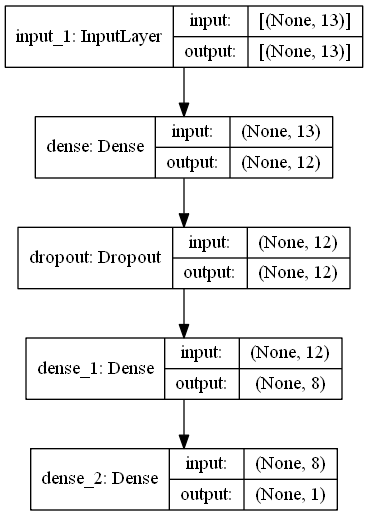

In [50]:
keras.utils.plot_model(model, show_shapes = True)

In [54]:
dataset_train = tf.data.Dataset.from_tensor_slices((x_train.values, y_train.values))
dataset_train = dataset_train.batch(16)

dataset_train.shuffle(128)

<ShuffleDataset shapes: ((None, 13), (None, 1)), types: (tf.float64, tf.int64)>

In [53]:
num_epochs = 100

In [55]:
dataset_val = tf.data.Dataset.from_tensor_slices((x_val.values, y_val.values))
dataset_val = dataset_val.batch(10)

In [56]:
training_history = model.fit(dataset_train, 
                             epochs = num_epochs, 
                             validation_data = dataset_val)

Epoch 1/100
13/13 [==============================] - 1s 27ms/step - loss: 0.6613 - accuracy: 0.6350 - precision: 0.6465 - recall: 0.6328 - val_loss: 0.6433 - val_accuracy: 0.6531 - val_precision: 0.8077 - val_recall: 0.6364
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6789 - accuracy: 0.6056 - precision: 0.6193 - recall: 0.5985 - val_loss: 0.6290 - val_accuracy: 0.6735 - val_precision: 0.8148 - val_recall: 0.6667
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6327 - accuracy: 0.6233 - precision: 0.6385 - recall: 0.6166 - val_loss: 0.6175 - val_accuracy: 0.6939 - val_precision: 0.8214 - val_recall: 0.6970
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6412 - accuracy: 0.6243 - precision: 0.6296 - recall: 0.6405 - val_loss: 0.6058 - val_accuracy: 0.6939 - val_precision: 0.8462 - val_recall: 0.6667
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6199 - accuracy: 0.6949 - precis

Epoch 38/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4161 - accuracy: 0.8174 - precision: 0.8490 - recall: 0.7812 - val_loss: 0.3994 - val_accuracy: 0.8163 - val_precision: 0.9286 - val_recall: 0.7879
Epoch 39/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3772 - accuracy: 0.8329 - precision: 0.8462 - recall: 0.8260 - val_loss: 0.3920 - val_accuracy: 0.8163 - val_precision: 0.9286 - val_recall: 0.7879
Epoch 40/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3951 - accuracy: 0.8134 - precision: 0.8370 - recall: 0.7918 - val_loss: 0.3872 - val_accuracy: 0.8163 - val_precision: 0.9286 - val_recall: 0.7879
Epoch 41/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3858 - accuracy: 0.8173 - precision: 0.8114 - recall: 0.8378 - val_loss: 0.3825 - val_accuracy: 0.8163 - val_precision: 0.9286 - val_recall: 0.7879
Epoch 42/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3783 - accuracy: 0.8291 - pr

13/13 [==============================] - 0s 4ms/step - loss: 0.3457 - accuracy: 0.8442 - precision: 0.8546 - recall: 0.8404 - val_loss: 0.3580 - val_accuracy: 0.8367 - val_precision: 0.9310 - val_recall: 0.8182
Epoch 75/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3441 - accuracy: 0.8343 - precision: 0.8031 - recall: 0.8952 - val_loss: 0.3593 - val_accuracy: 0.8367 - val_precision: 0.9310 - val_recall: 0.8182
Epoch 76/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3507 - accuracy: 0.8501 - precision: 0.8593 - recall: 0.8461 - val_loss: 0.3571 - val_accuracy: 0.8571 - val_precision: 0.9643 - val_recall: 0.8182
Epoch 77/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3873 - accuracy: 0.7955 - precision: 0.7691 - recall: 0.8581 - val_loss: 0.3605 - val_accuracy: 0.8571 - val_precision: 0.9643 - val_recall: 0.8182
Epoch 78/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4013 - accuracy: 0.8104 - precision: 0.79

In [59]:
training_history.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

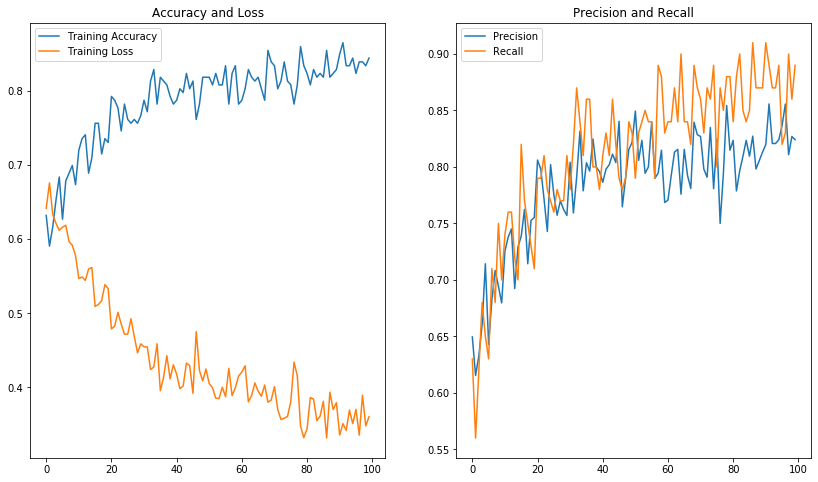

In [60]:
train_acc = training_history.history['accuracy']
train_loss = training_history.history['loss']

precision = training_history.history['precision']
recall = training_history.history['recall']

epochs_range = range(num_epochs)

plt.figure(figsize=(14,8))
plt.subplot(1,2,1)

plt.plot(epochs_range, train_acc, label = 'Training Accuracy')
plt.plot(epochs_range, train_loss, label = 'Training Loss')

plt.title('Accuracy and Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range, precision, label = 'Precision')
plt.plot(epochs_range, recall, label = 'Recall')

plt.title('Precision and Recall')
plt.legend()
plt.show()

In [61]:
score = model.evaluate(x_test, y_test)

score_df = pd.Series(score, index = model.metrics_names)

2/2 [==============================] - 0s 2ms/step - loss: 0.4108 - accuracy: 0.8361 - precision: 0.8667 - recall: 0.8125


In [62]:
score_df

loss         0.410812
accuracy     0.836066
precision    0.866667
recall       0.812500
dtype: float64

In [63]:
y_pred = model.predict(x_test)

y_pred[:10] # Probability Scores

array([[0.17144299],
       [0.70453036],
       [0.97495914],
       [0.05973086],
       [0.6831494 ],
       [0.9528409 ],
       [0.7234653 ],
       [0.00112298],
       [0.02602404],
       [0.39153492]], dtype=float32)

In [64]:
y_pred = np.where(y_pred>=0.5, 1, y_pred)
y_pred = np.where(y_pred<0.5, 0, y_pred)

In [66]:
y_pred[:10]

array([[0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [78]:
pred_results = pd.DataFrame({'y_test': y_test.values.flatten(),
                            'y_pred': y_pred.flatten().astype(int)}, 
                            index = range(len(y_pred)))

In [79]:
pred_results.sample(10)

,y_test,y_pred
14,1,1
42,1,1
34,1,0
20,1,1
22,0,0
25,0,1
23,1,0
21,0,0
49,0,0
32,0,0


In [80]:
pd.crosstab(pred_results.y_pred, pred_results.y_test)

y_test,0,1
y_pred,,
0,25,6
1,4,26
